In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal
from PIL import Image


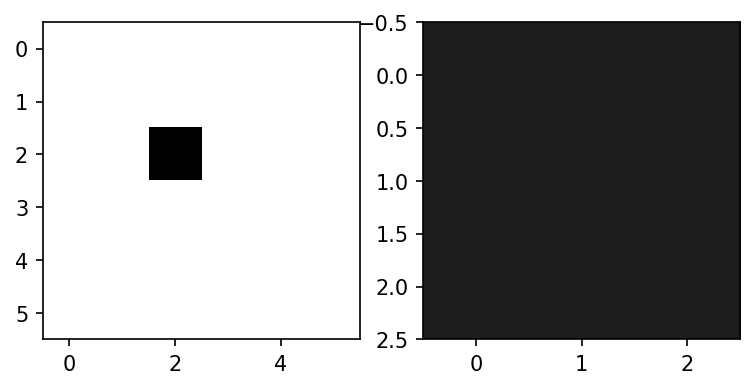

In [2]:
A = np.full((6, 6), 255)
A[2, 2] = 0

B = np.full((3, 3), 1/9)

plt.figure(figsize=(6, 4), dpi=150)


plt.subplot(1, 2, 1)
plt.imshow(A, cmap="gray", vmin=0, vmax=255)

plt.subplot(1, 2, 2)
plt.imshow(B, cmap="gray", vmin=0, vmax=1)

6


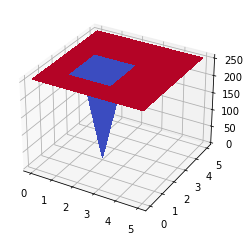

In [3]:
print(A.shape[0])
X = np.arange(0, A.shape[0])
Y = np.arange(0, A.shape[1])

X, Y = np.meshgrid(X, Y)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(X, Y, A, cmap="coolwarm",
                       linewidth=0, antialiased=False)

Text(0.5, 1.0, 'Valid')

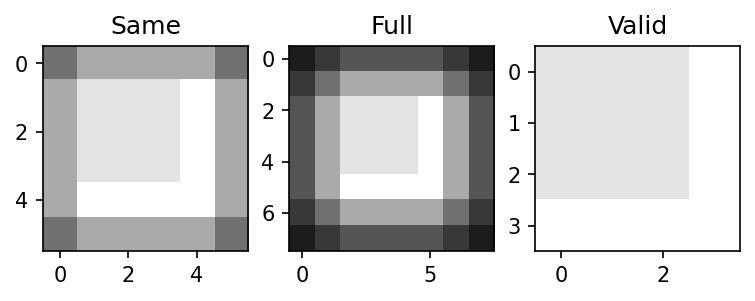

In [4]:

C_same = scipy.signal.convolve(A, B, mode="same")

C_full = scipy.signal.convolve(A, B, mode="full")

C_valid = scipy.signal.convolve(A, B, mode="valid")

plt.figure(figsize=(6, 4), dpi=150)

plt.subplot(1, 3, 1)
plt.imshow(C_same, cmap="gray", vmin=0, vmax=255)
plt.title("Same")

plt.subplot(1, 3, 2)
plt.imshow(C_full, cmap="gray", vmin=0, vmax=255)
plt.title("Full")

plt.subplot(1, 3, 3)
plt.imshow(C_valid, cmap="gray", vmin=0, vmax=255)
plt.title("Valid")


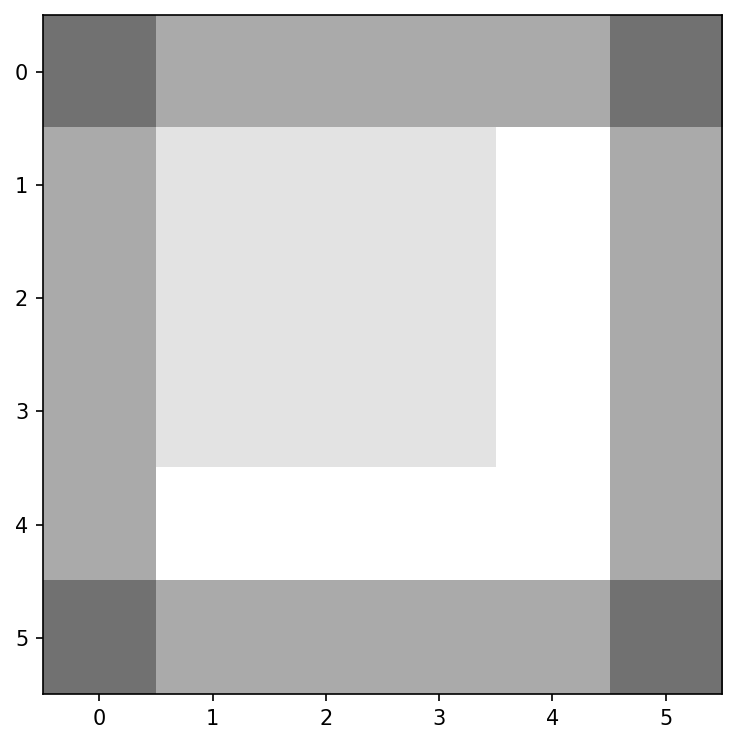

In [5]:
plt.figure(figsize=(6, 6), dpi=150)
plt.imshow(C_same, cmap="gray", vmin=0, vmax=255)


490


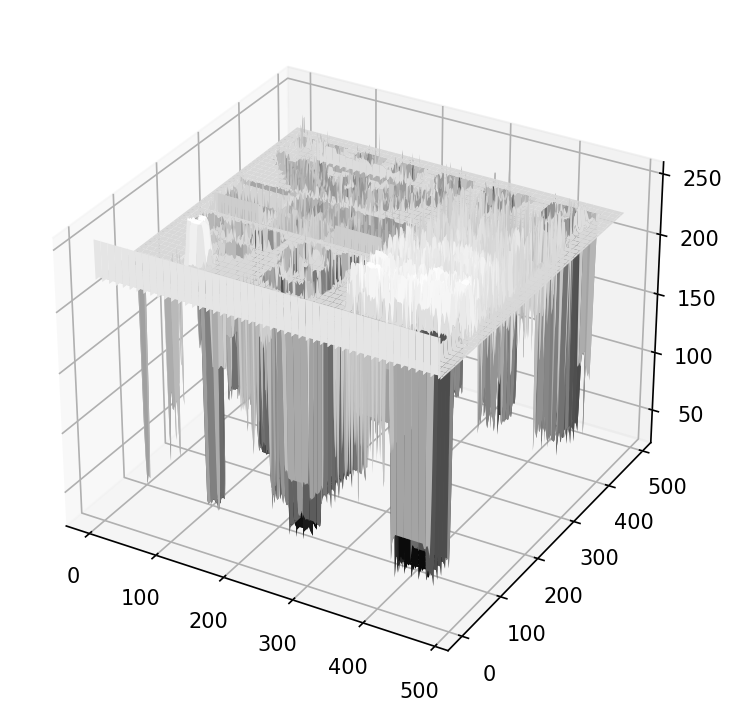

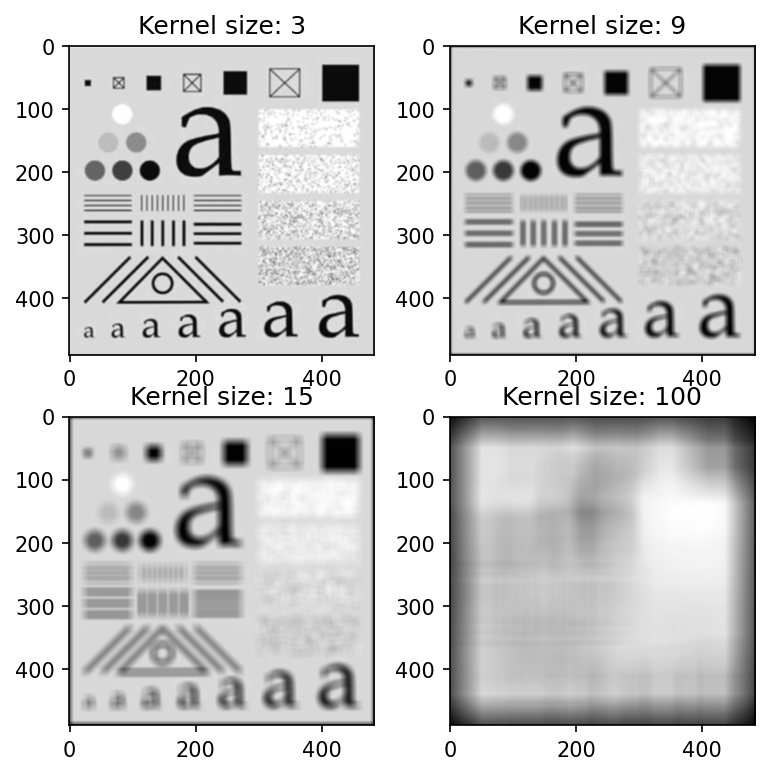

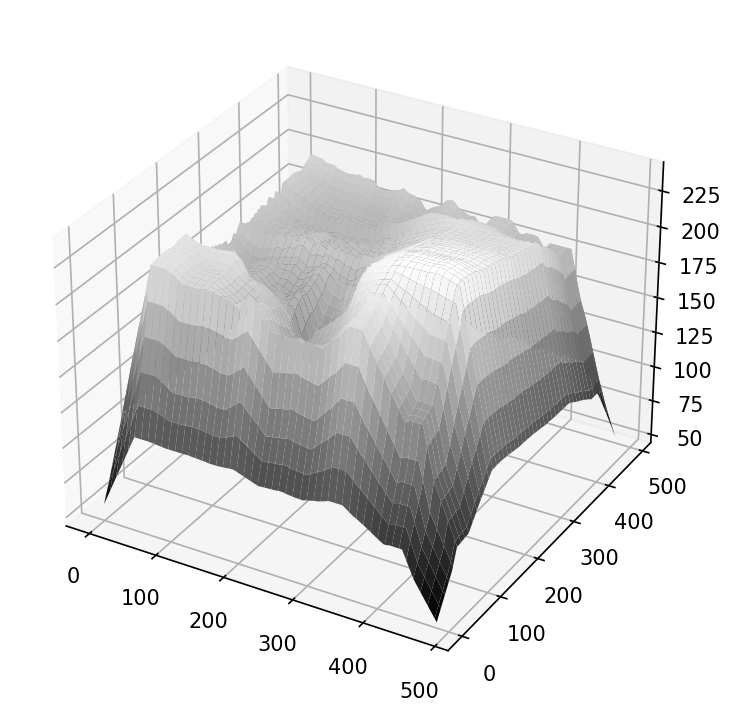

In [6]:
A =  Image.open("images/07/pattern.png").convert("L")

A = np.asarray(A)

print(A.shape[0])
Y = np.arange(0, A.shape[0])
X = np.arange(0, A.shape[1])

X, Y = np.meshgrid(X, Y)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize= (6, 6), dpi=150)
ax.plot_surface(X, Y, A, cmap="gray",
                       linewidth=0, antialiased=True)

kernel_sizes = [3, 9, 15, 100]

plt.figure(figsize=(6,6), dpi=150)

for i, k in enumerate(kernel_sizes):
    B = np.full((k, k), 1/(k ** 2))
    C = scipy.signal.convolve(A, B, mode="same")
    
    plt.subplot(2, 2, i + 1)
    plt.imshow(C, cmap="gray")
    plt.title(f"Kernel size: {k}")

Y = np.arange(0, C.shape[0])
X = np.arange(0, C.shape[1])

X, Y = np.meshgrid(X, Y)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize= (6, 6), dpi=150)
ax.plot_surface(X, Y, C, cmap="gray",
                       linewidth=0, antialiased=True)
